# OpenCV基础教程
本文档提供了一个使用OpenCV进行图像处理并进行图像识别的教程。本教程将会使用Python语言进行编写，因此学员需要具备一定的Python基础知识。

## 什么是OpenCV？
OpenCV是一个开源的计算机视觉库，它可以帮助我们进行图像处理、图像识别等操作。OpenCV可以在多个平台上运行，包括Windows、Linux、MacOS等。OpenCV提供了多种语言的接口，包括C++、Python、Java等。本教程将会使用Python语言进行编写。

该库拥有超过2500种优化算法，其中包括⼀套全⾯的经典和最先进的计算机视觉和机器学习算法。这些算法可以⽤于检测和识别⼈脸，识别物体，分类视频中的⼈类⾏为，跟踪相机运动，跟踪移动的物 体，提取物体的3D模型，从⽴体相机产⽣3D点云，将图像拼接在⼀起产⽣整个场景的⾼分辨率图像，从图像数据库中找到类似的图像，从使⽤闪光灯拍摄的图像中去除红⾊的眼睛，跟踪眼睛的运动，识别⻛景，建⽴标记，⽤增强现实覆盖它等。


## 什么是图像？
* 图像的本质是由许多个像素点构成
* 每一个像素点都有对应的颜色
* 每一种颜色由RGB三种颜(Red, Green, Blue)色混合而成

<p float="left">
  <img src="Img/whatisimg0.png" width="500" />
  <img src="Img/whatisimg.png" width="540" /> 
</p>


## 什么是相机？
当涉及到OpenCV和视觉识别时，相机是一个关键的硬件设备。相机是一种用于捕捉图像的设备，它通过感光元件（通常是图像传感器）将光信号转换为电信号。这些电信号经过处理后形成数字图像。

以下是有关相机的一些基本概念：

* 图像传感器： 图像传感器是相机的核心组件之一。它负责将光信号转换为电信号。在数字相机中，常见的图像传感器类型包括CMOS（Complementary Metal-Oxide-Semiconductor）和CCD（Charge-Coupled Device）。

* 分辨率： 相机的分辨率是指图像的大小，通常以像素为单位。高分辨率的相机能够捕捉更多的细节，但也可能导致图像文件更大。

* 快门速度： 快门速度指的是相机的曝光时间，即相机的感光元件暴露于光线的时间长度。较短的曝光时间可用于捕捉运动物体，而较长的曝光时间适用于低光条件。

* 光圈： 光圈是相机镜头的光阑的直径，它控制进入相机的光线量。较小的光圈值表示更大的光圈，允许更多光线进入，适用于低光条件。

* 焦距： 焦距是指从镜头到焦平面的距离，通常以毫米为单位。较长的焦距通常用于拍摄远距离物体，而较短的焦距适用于广角拍摄。

* 对焦： 对焦是确保图像清晰的过程。相机可以手动或自动对焦，以调整镜头的焦距。

在OpenCV中，你可以使用相机捕捉图像，并使用各种图像处理技术进行视觉识别。OpenCV提供了一组功能强大的工具，用于图像处理、特征提取、物体检测等任务。你可以使用OpenCV与相机进行交互，捕捉实时图像，并通过算法实现不同的视觉识别应用。
![图片](Img/camera.jpg "camera")

## 图像处理
### 安装依赖库
本教程将使用python作为开发语言，因此需要安装python的相关依赖库，可以使用python自带的pip工具安装依赖库

In [4]:
! pip install matplotlib
! pip install opencv-python
! pip install numpy

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


### 使用OpenCV提供的函数读取图片

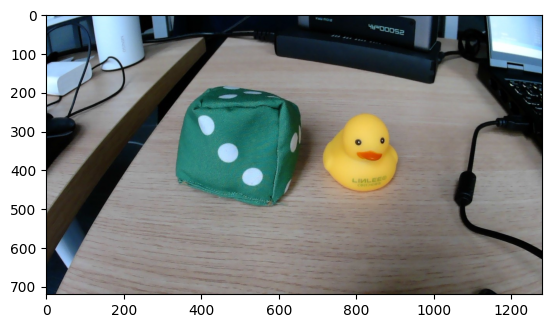

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 读取图片
dst = cv2.imread('img/fish and duck.jpg', 1)

plt_img = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(plt_img)
plt.show()

### 畸变校正
畸变矫正是计算机视觉中的一个重要概念，主要用于修正由于镜头造成的图像畸变。镜头畸变主要有两种类型：径向畸变和切向畸变。

* 径向畸变：这种畸变使得直线在图像中呈现为曲线。径向畸变通常由镜头的球面形状引起，因为镜头的边缘部分比中心部分更有可能将光线折射至图像的错误位置。径向畸变通常可以通过添加一些修正项到原始的镜头投影方程来矫正。

* 切向畸变：这种畸变使得图像看起来像是被拉伸或压缩。切向畸变通常由于镜头和图像传感器之间的不完全平行引起。切向畸变可以通过在原始的镜头投影方程中添加一些修正项来矫正。

在OpenCV中，可以使用`cv2.undistort()`函数来进行畸变矫正。

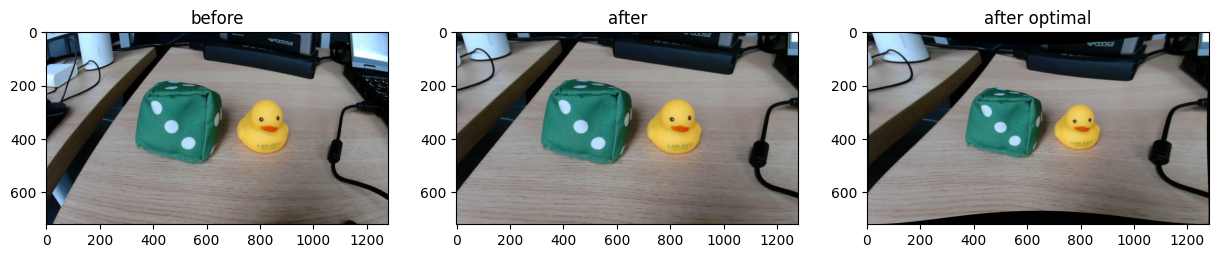

In [6]:
# 经过相机标定后得出的矫正矩阵

K = np.mat(
    [
        [932.046481677477, 0, 640],
        [0, 930.927098553708, 360],
        [0, 0, 1],
    ]
)

d_coef = np.mat(
    [
        [
            -0.433081852294034,
            0.236666891127809,
            0.00120122450744650,
            0.000301708180399161,
            0,
        ]
    ]
)

new_K, roi = cv2.getOptimalNewCameraMatrix(K, d_coef, (1280, 720), 1, (1280, 720))

dst_raw = dst.copy()
dst = cv2.undistort(dst, K, d_coef)
dst_optimal = cv2.undistort(dst, K, d_coef, None, new_K)

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.title("before")
plt.imshow(cv2.cvtColor(dst_raw, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.title("after")
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.title("after optimal")
plt.imshow(cv2.cvtColor(dst_optimal, cv2.COLOR_BGR2RGB))

plt.show()

### RGB颜色空间
RGB颜色空间是一种将颜色表示为红色、绿色和蓝色的组合的方式。在RGB颜色空间中，每种颜色的取值范围为0-255，其中0表示没有该颜色，255表示该颜色的最大值。例如，红色的RGB值为(255, 0, 0)，绿色的RGB值为(0, 255, 0)，蓝色的RGB值为(0, 0, 255)。

<p float="left">
  <img src="Img/rgb.png" width="500" />
</p>

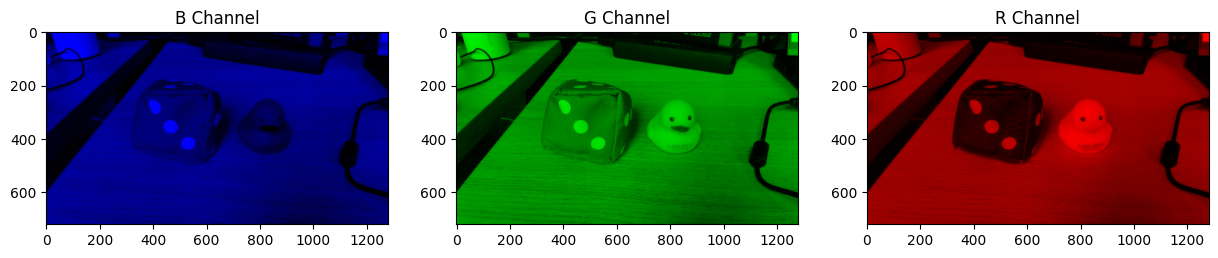

In [7]:
#分离出图片的B，R，G颜色通道
B,G,R = cv2.split(dst)
#创建与image相同大小的零矩阵                       
zeros = np.zeros(dst.shape[:2],dtype="uint8")

dst_B = cv2.merge([B,zeros,zeros])
dst_G = cv2.merge([zeros,G,zeros])
dst_R = cv2.merge([zeros,zeros,R])

plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(dst_B, cv2.COLOR_BGR2RGB))
plt.title('B Channel')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(dst_G, cv2.COLOR_BGR2RGB))
plt.title('G Channel')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(dst_R, cv2.COLOR_BGR2RGB))
plt.title('R Channel')

plt.show()

### 灰度图像
灰度图像是一种将颜色表示为灰度值的图像。在灰度图像中，每个像素的取值范围为0-255，其中0表示黑色，255表示白色。灰度图像的RGB值为(128, 128, 128)。

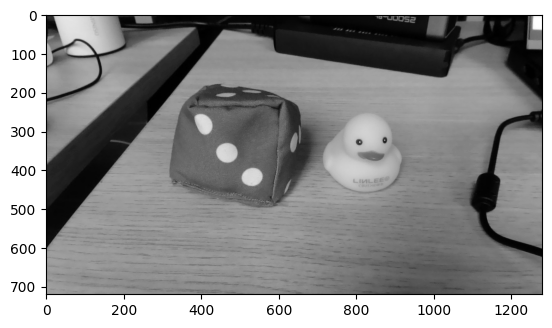

In [8]:
gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.show()

### 转换HSV颜色空间
HSV是一种颜色模型，全称为Hue（色调）、Saturation（饱和度）和Value（亮度）。

* Hue（色调）：表示颜色类型，如红色、蓝色或绿色。在OpenCV中，Hue的取值范围是0-179。
* Saturation（饱和度）：表示颜色的纯度，饱和度越高，颜色越纯，饱和度越低，颜色越接近灰色。在OpenCV中，Saturation的取值范围是0-255。
* Value（亮度）：表示颜色的亮度。在OpenCV中，Value的取值范围是0-255。

HSV颜色模型常用于颜色识别和跟踪，因为它对光照变化的影响较小。在OpenCV中，可以使用cv2.cvtColor函数将BGR颜色模型转换为HSV颜色模型。
![图片](Img/hsv.png "hsv")

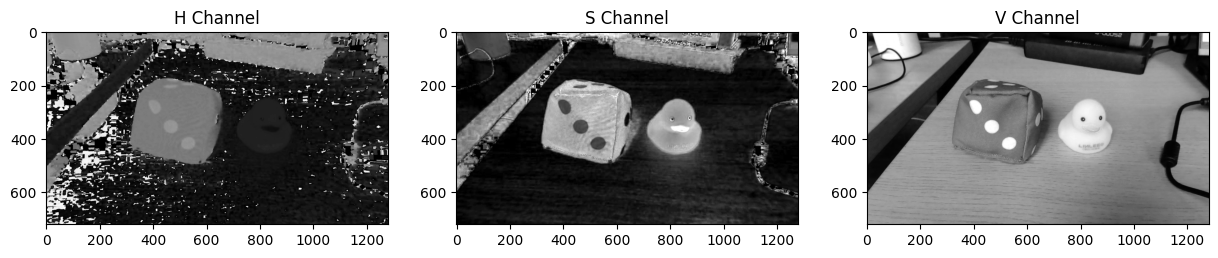

In [9]:
hsv = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)

H_channel, S_channel, V_channel = cv2.split(hsv)

plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(H_channel, cmap='gray')
plt.title('H Channel')

plt.subplot(1, 3, 2)
plt.imshow(S_channel, cmap='gray')
plt.title('S Channel')

plt.subplot(1, 3, 3)
plt.imshow(V_channel, cmap='gray')
plt.title('V Channel')

plt.show()

### 对HSV图像进行二值化处理
在OpenCV中，`cv2.inRange()`函数可以用于在HSV颜色空间中进行二值化处理。这个函数会检查输入数组（图像）的每个元素是否在给定的范围之内。如果在范围内，输出数组的对应元素就被设置为255（白色），否则就被设置为0（黑色）。

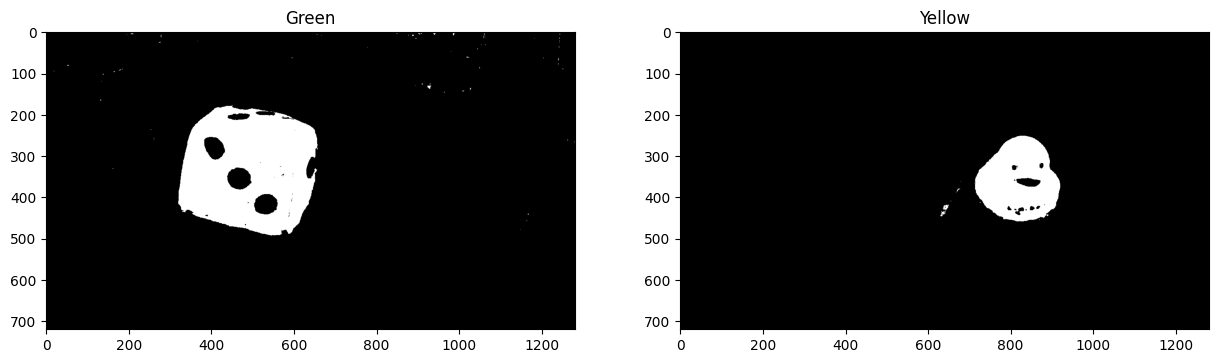

In [10]:
# 设定绿色阈值
green_lower = np.array([50, 100, 20])
green_upper = np.array([90, 255, 255])

# 二值化筛选出绿色
binary_green = cv2.inRange(hsv, green_lower, green_upper)

# 设定黄色阈值
yellow_lower = np.array([15, 100, 80])
yellow_upper = np.array([25, 255, 255])

# 二值化筛选出黄色
binary_yellow = cv2.inRange(hsv, yellow_lower, yellow_upper)

plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.imshow(binary_green, cmap='gray')
plt.title('Green')

plt.subplot(1, 2, 2)
plt.imshow(binary_yellow, cmap='gray')
plt.title('Yellow')

plt.show()

### 使用形态学操作对二值图像进行处理

形态学操作是一种处理二值图像的技术，主要用于图像处理和计算机视觉领域。它基于图像形状进行操作，通常用于去除噪声、分离或合并重叠的对象等。

形态学操作主要包括以下几种基本操作：

* 腐蚀（Erosion）：这个操作会“腐蚀”图像中的前景物体（即，将白色像素变为黑色）。具体来说，它会在原图像的每一个像素位置上放置一个结构元素，如果该结构元素与前景物体完全重合，则原像素值保持不变，否则，该像素值被置为0。

* 膨胀（Dilation）：这个操作与腐蚀操作相反，它会“膨胀”图像中的前景物体（即，将黑色像素变为白色）。具体来说，只要结构元素与前景物体有一个像素点重合，原像素值就被置为255。

* 开运算（Opening）：先进行腐蚀操作，后进行膨胀操作。开运算可以用来去除噪声。

* 闭运算（Closing）：先进行膨胀操作，后进行腐蚀操作。闭运算可以用来填充物体内部的小洞或小黑点。

在OpenCV中，可以使用cv2.erode(), cv2.dilate(), cv2.morphologyEx()等函数进行形态学操作。

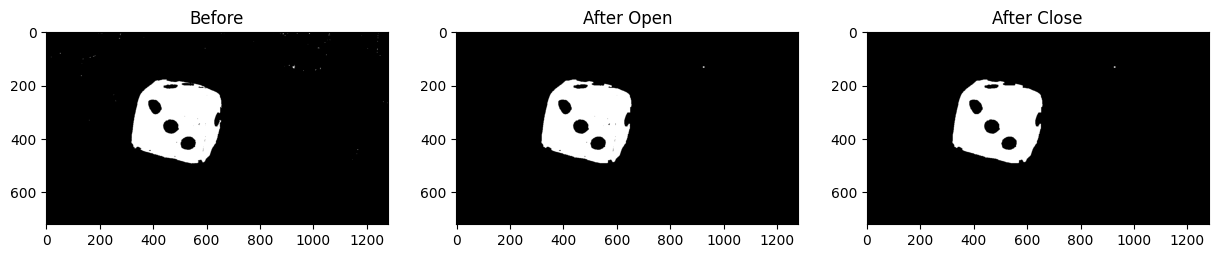

In [11]:
# 创建卷积核
kernel = np.ones((5, 5), np.uint8)

img_1 = binary_green.copy()

# 开操作
binary_green = cv2.morphologyEx(binary_green, cv2.MORPH_OPEN, kernel)
img_2 = binary_green.copy()

# 闭操作
binary_green = cv2.morphologyEx(binary_green, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(img_1, cmap='gray')
plt.title('Before')

plt.subplot(1, 3, 2)
plt.imshow(img_2, cmap='gray')
plt.title('After Open')

plt.subplot(1, 3, 3)
plt.imshow(binary_green, cmap='gray')
plt.title('After Close')

plt.show()

### 获取轮廓
在OpenCV中，轮廓可以被理解为形状的边界，更具体地说，是连续的点集合。轮廓通常用于对象的检测和识别。

在OpenCV中，可以使用cv2.findContours()函数来查找图像中的轮廓。这个函数有三个参数：输入图像、轮廓检索模式和轮廓近似方法。

* 输入图像：通常是二值图像，通常是通过阈值分割或边缘检测处理过的图像。
* 轮廓检索模式：这决定了轮廓的检索方式，例如，cv2.RETR_TREE会检索所有的轮廓并建立完整的轮廓层次结构。其他模式还包括cv2.RETR_EXTERNAL（只检索最外面的轮廓）和cv2.RETR_LIST（检索所有轮廓并将其保存到列表中）。
* 轮廓近似方法：这决定了轮廓的近似方法，例如，cv2.CHAIN_APPROX_SIMPLE只保存轮廓的端点，而cv2.CHAIN_APPROX_NONE会保存轮廓上的所有点。
* cv2.findContours()函数会返回两个结果：轮廓和层次。轮廓是一个Python列表，其中包含图像中所有轮廓。每一个轮廓都是一个Numpy数组，包含对象边界点（x，y）的坐标。

一旦找到了轮廓，就可以进行许多操作，如计算轮廓的面积、周长、质心，检测图像中的形状等。

/var/folders/jj/85ybcsq52cj4vd3ms6d_wh5c0000gn/T/ipykernel_7330/1945288379.py:21: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


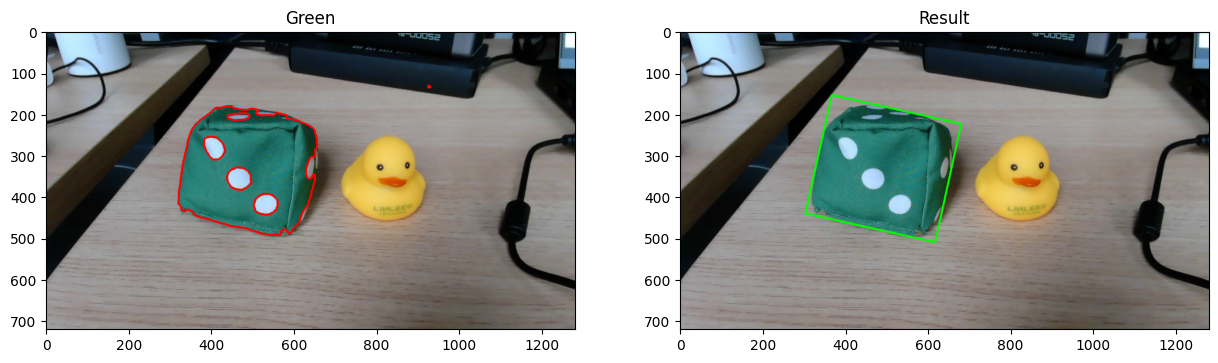

In [12]:
dst_green = dst.copy()
# 轮廓检测
contours, hierarchy = cv2.findContours(binary_green, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# 绘制轮廓
cv2.drawContours(dst_green, contours, -1, (0, 0, 255), 3)

detected_countours = []

def drawBox(dst, contours):
    global detected_countours
    # 筛选轮廓
    for i in range(len(contours)):
        # 轮廓面积
        area = cv2.contourArea(contours[i])
        if area < 5000:
            continue
        # 找到最小矩形
        rect = cv2.minAreaRect(contours[i])
        # 计算最小矩形的坐标
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        # 绘制最小矩形
        cv2.drawContours(dst, [box], 0, (0, 255, 0), 3)

        detected_countours.append(contours[i])
    

drawBox(dst, contours)

plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(dst_green, cv2.COLOR_BGR2RGB))
plt.title('Green')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Result')

plt.show()

/var/folders/jj/85ybcsq52cj4vd3ms6d_wh5c0000gn/T/ipykernel_7330/1945288379.py:21: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


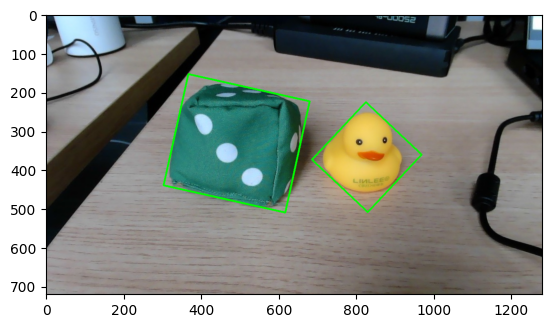

In [13]:
dst_yellow = dst.copy()

# 轮廓检测
contours, hierarchy = cv2.findContours(binary_yellow, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

drawBox(dst, contours)

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 获取目标坐标
`cv2.moments()`是OpenCV库中的一个函数，用于计算图像的矩。矩是图像的一种数学描述，可以提供关于图像形状的有用信息。

`cv2.moments()`函数接收一个二值图像（通常是轮廓）作为输入，返回一个包含所有矩的字典。这个字典包含了中心矩、空间矩和中心归一化矩等。

以下是一些常用的矩：

* 空间矩（Spatial Moments）：M00, M10, M01, M20, M11, M02, M30, M21, M12, M03
* 中心矩（Central Moments）：mu20, mu11, mu02, mu30, mu21, mu12, mu03
* 中心归一化矩（Central Normalized Moments）：nu20, nu11, nu02, nu30, nu21, nu12, nu03

其中，M00矩是图像的面积，M10和M01主要用于计算图像的质心。质心的x坐标可以通过M10/M00得到，质心的y坐标可以通过M01/M00得到，其中M00是图像的面积（即所有像素强度的总和）。

In [14]:
print('轮廓数量：', len(detected_countours))

# 计算轮廓的中心点
def getCenter(contour):
    # 计算轮廓的矩
    M = cv2.moments(contour)
    if M['m00'] == 0:
        return 0, 0
    else:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        return cx, cy
    
green_x ,green_y = getCenter(detected_countours[0])
yellow_x ,yellow_y = getCenter(detected_countours[1])

print('绿色轮廓中心点：', green_x, green_y)
print('黄色轮廓中心点：', yellow_x, yellow_y)

轮廓数量： 2
绿色轮廓中心点： 489 335
黄色轮廓中心点： 819 362


### 转换图像坐标原点到图像中心
在OpenCV中，图像的坐标系统是以左上角为原点(0,0)，向右为x轴，向下为y轴。

例如，如果我们有一个宽度为W，高度为H的图像，那么：

* 左上角的坐标是 (0, 0)
* 右上角的坐标是 (W-1, 0)
* 左下角的坐标是 (0, H-1)
* 右下角的坐标是 (W-1, H-1)

注意，这与一些其他图形库或数学中的常见坐标系统不同，其中原点通常在左下角，向右为x轴，向上为y轴。

绿色轮廓中心点： -151 25
黄色轮廓中心点： 179 -2


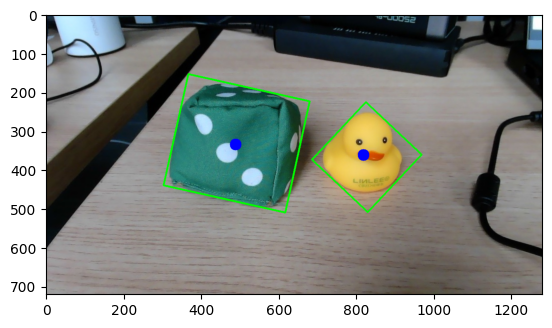

In [15]:
def drawCenter(dst, x, y):
    cv2.circle(dst, (x, y), 15, (255, 0, 0), -1)

# 绘制中心点
drawCenter(dst, green_x, green_y)
drawCenter(dst, yellow_x, yellow_y)

# 坐标转换
def TransformCoordinate(x, y):
    x = x - 640
    y = 360 - y
    return x, y

green_x, green_y = TransformCoordinate(green_x, green_y)
yellow_x, yellow_y = TransformCoordinate(yellow_x, yellow_y)

print('绿色轮廓中心点：', green_x, green_y)
print('黄色轮廓中心点：', yellow_x, yellow_y)

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()